### Student Information
Name: 余雅韻

Student ID: 114577002

GitHub ID: yyyynwa

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [539]:
### Begin Assignment Here

---

In [540]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [541]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

/Users/irene/Documents/Program/2025_Fall/DM2025Labs/DM2025-Lab1-Exercise/.venv/bin/python
3.11.10 (main, Oct 16 2024, 08:56:36) [Clang 18.1.8 ]


---

## 1. The Data

In [542]:
import pandas as pd
newdataset = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

print(newdataset.head(5))

      type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is begging Xi Jinping...          Just-Big6411   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1     

## 2. Data Preparation

newdataset_columns = [
  'type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 
  'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 
  'polarity', 'sentiment', 'entities', 'label'
]


In [543]:
# categories
categories = ['Neutral', 'Positive', 'Negative']

In [544]:
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

In [545]:
from sklearn.utils import Bunch

newdataset = Bunch(
    data=df['text'].values,
    titles=df['title'].values,
    target=df['sentiment'].astype(int).values,
    polarity=df['polarity'].values,
    subjectivity=df['subjectivity'].values,
    target_names=categories
) 

In [546]:
newdataset.data[0:2]

array(['Calls on retards',
       'Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.'],
      dtype=object)

In [547]:
newdataset.target_names

['Neutral', 'Positive', 'Negative']

In [548]:
len(newdataset.data)

847

In [549]:
len(newdataset.target_names)

3

sentiment	-1	1	0	1	0
label	-1	0	0	1	-1

In [550]:
print("\n".join(newdataset.data[5].split("\n")))

Hoping to ejaculate in wet warm puss tonight, wish me luck


In [551]:
print(newdataset.target_names[int(newdataset.target[0])])

Negative


In [552]:
newdataset.target[0]

np.int64(-1)

In [553]:
newdataset.target[0:10]
#label

array([-1,  1,  0,  1,  0,  1, -1,  1,  1,  0])

In [554]:
for t in newdataset.target[:10]:
    print(newdataset.target_names[t])

Negative
Positive
Neutral
Positive
Neutral
Positive
Negative
Positive
Positive
Neutral


In [555]:
for i in range(5):
    print(f'Example {i+1}')
    print('\n'.join(newdataset.data[i].split('\n')))

Example 1
Calls on retards
Example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Example 3
Seeing lots of red in the ticker.
Example 4
Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has achieved the unthinkable – a blazing 116 mph on water! This isn't just about speed; it's about propelling electric boating into a new era. Their cutting-edge technology, combined with Torrente's skill, is making waves that'll ripple for generations.

**Highlight Main Points**

* Vision Marine Technologies Inc. achieves a record-breaking 116 mph speed on water with Shaun Torrente.
* The feat highlights the power of electric boating and pushes the limits of innovation.
* Partners like Octillion Power Systems and Danfoss Editron contribute to this groundbreaking achievement.

**TLDR**

Hold onto your seats – Vision Marine Technologies Inc. and Shaun To

In [556]:
for t in newdataset.target[:10]:
    print(newdataset.target_names[t])

Negative
Positive
Neutral
Positive
Neutral
Positive
Negative
Positive
Positive
Neutral


---

## 3. Data Transformation
Transform data into tabular format.

---

### 3.1 Converting Dictionary into Pandas Dataframe

In [557]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(newdataset), columns= ['text'])

In [558]:
len(X)

847

In [559]:
X[0:2]

,text
0,Calls on retards
1,Stunt as in like why did they even make a big ...


In [560]:
for t in X["text"][:2]:
    print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.


### Adding Columns

In [561]:
# add category to the dataframe
X['category'] = newdataset.target

In [562]:
# add category label
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, newdataset))

In [563]:
X[0:10]

,text,category,category_name
0,Calls on retards,-1,Negative
1,Stunt as in like why did they even make a big ...,1,Positive
2,Seeing lots of red in the ticker.,0,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,1,Positive
4,He didn’t say thank you.,0,Neutral
5,"Hoping to ejaculate in wet warm puss tonight, ...",1,Positive
6,Trump will respond to china increasing their t...,-1,Negative
7,Confirmed not a trap. Its been like this for p...,1,Positive
8,Am I the only one seeing the cup & handle brea...,1,Positive
9,HLGN is $10. Hurry and catch it now before it ...,0,Neutral


---

### 3.2 Familiarizing yourself with the Data

To query for the first 10 rows (documents), and keep the `text` and `category_name` attributes or fields.

In [564]:
# a simple query
X[:10][["text","category_name"]]

,text,category_name
0,Calls on retards,Negative
1,Stunt as in like why did they even make a big ...,Positive
2,Seeing lots of red in the ticker.,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,Positive
4,He didn’t say thank you.,Neutral
5,"Hoping to ejaculate in wet warm puss tonight, ...",Positive
6,Trump will respond to china increasing their t...,Negative
7,Confirmed not a trap. Its been like this for p...,Positive
8,Am I the only one seeing the cup & handle brea...,Positive
9,HLGN is $10. Hurry and catch it now before it ...,Neutral


#### Let's query the last 10 records

In [565]:
X[-10:]

,text,category,category_name
837,Finance media lying *Surprise*,0,Neutral
838,I am all in,0,Neutral
839,The Art of the Deal…,0,Neutral
840,Lol fr,1,Positive
841,So countries “begging to stop the tariffs” and...,0,Neutral
842,Invest now it is going to shoot up tomorrow,0,Neutral
843,Where can I read this?,0,Neutral
844,"Upgrades, Downgrades [Stock Analyst Recommen...",0,Neutral
845,i sold my puts so i expect cheeto to declare w...,0,Neutral
846,![img](emote|t5_2th52|31224),0,Neutral


Build-in function called `loc` allows to explicity define the columns to query.

In [566]:
# using loc (by label)
X.loc[:10, 'text']

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object

`iloc` function to query a selection dataset by position. 

In [567]:
# using iloc (by position)
X.iloc[:10, 0]

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object

### **>>> Exercise 2 (take home):** 
Other querying techniques using pandas dataframes.

In [568]:
#Answer here
# to query for the first 10 rows 
print(X.head(10))

# to keep the `text` and `category_name` attributes or fields
print(X.head(10).filter(items=['text', 'category_name']))

# to query the last 10 records
print(X.head(-10))

                                                text  category category_name
0                                   Calls on retards        -1      Negative
1  Stunt as in like why did they even make a big ...         1      Positive
2                  Seeing lots of red in the ticker.         0       Neutral
3  Vision Marine Technologies Inc. is rewriting t...         1      Positive
4                           He didn’t say thank you.         0       Neutral
5  Hoping to ejaculate in wet warm puss tonight, ...         1      Positive
6  Trump will respond to china increasing their t...        -1      Negative
7  Confirmed not a trap. Its been like this for p...         1      Positive
8  Am I the only one seeing the cup & handle brea...         1      Positive
9  HLGN is $10. Hurry and catch it now before it ...         0       Neutral
                                                text category_name
0                                   Calls on retards      Negative
1  Stunt as in like

---

### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the category, and query every 10th record. Only show the first 5 records.

In [569]:
# Answer here
X[X['category_name']=='Positive'][::10][0:5]

,text,category,category_name
1,Stunt as in like why did they even make a big ...,1,Positive
25,"You see, Target, pissing off a good chunk of y...",1,Positive
56,"To be fair, Chinese exports to the US make up ...",1,Positive
73,"Look, the USA somehow thought a second term f...",1,Positive
96,200k loss in a month.. haha,1,Positive


---

## 4. Data Mining using Pandas

### 4.1 Missing Values

Add the dummy records with missing values

In [570]:
# check missing values
X.isnull()

,text,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
842,False,False,False
843,False,False,False
844,False,False,False
845,False,False,False


`isnull` function looks through the entire dataset for null values and returns `True` 

In [571]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


---

### >>> **Exercise 4 (Watch Video):** 
To calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [572]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

---

Insert some dummy data into the dataframe and test the reliability of the function.
`Series` basically a "one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). 

In [573]:
# Axis labels called "index"
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [574]:
dummy_series

text        dummy_record
category               1
dtype: object

In [575]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

,text,category
0,dummy_record,1


In [576]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [577]:
# check if the records was commited into result
len(result_with_series)

848

Add the record with some missing values.
Detect that there is a missing value on the resulting dataframe or not.

In [578]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


Insert a simple dictionary directly into the dataframe `X`. 

In [579]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [580]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [581]:
len(X)

848

In [582]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


The code to drop the record with missing.

In [583]:
X.dropna(inplace=True)

In [584]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [585]:
len(X)

847

---

### 4.2 Dealing with Duplicate Data

Check how many duplicates in the current dataset. 
Similar to the `isnull` function used to check for missing values. 

In [586]:
X.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

Check the sum of duplicate records:

In [587]:
sum(X.duplicated())

23

all the `duplicated()` operation check per records instead of per column. 

In [588]:
sum(X.duplicated('text'))

23

Create some duplicated dummy records and append it to the main dataframe `X`.

In [589]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [590]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [591]:
len(X)

849

In [592]:
sum(X.duplicated())

24

To get rid of all the duplicated records without preserving a copy. 

In [593]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [594]:
len(X)

813

---

## 5.  Data Preprocessing
- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

---

### 5.1 Sampling

In [595]:
X_sample = X.sample(n=600) #random state

In [596]:
len(X_sample)

600

In [597]:
X_sample[0:4]

,text,category,category_name
16,Jesus Christ,0,Neutral
107,![gif](giphy|3oz8xZGfHArTvh99YI),0,Neutral
180,And r/conservative are currently chest bumping...,1,Positive
499,Red pill for the masses. All propaganda.,-1,Negative


---

In [598]:
X_sample[0:10]

,text,category,category_name
16,Jesus Christ,0,Neutral
107,![gif](giphy|3oz8xZGfHArTvh99YI),0,Neutral
180,And r/conservative are currently chest bumping...,1,Positive
499,Red pill for the masses. All propaganda.,-1,Negative
308,MegaWatt's making moves! Bagging Labrador Mine...,-1,Negative
330,Hey guys! Currently on vacation which has been...,1,Positive
607,Trump crashed the economy worse than Liz Truss...,-1,Negative
167,Happening now,0,Neutral
790,Tesla and Amazon and Apple and Nvidia are in t...,0,Neutral
488,Oh damn that happened to US citizens? Wonder w...,0,Neutral


In [599]:
X[0:10]

,text,category,category_name
0,Calls on retards,-1,Negative
1,Stunt as in like why did they even make a big ...,1,Positive
2,Seeing lots of red in the ticker.,0,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,1,Positive
4,He didn’t say thank you.,0,Neutral
5,"Hoping to ejaculate in wet warm puss tonight, ...",1,Positive
6,Trump will respond to china increasing their t...,-1,Negative
7,Confirmed not a trap. Its been like this for p...,1,Positive
8,Am I the only one seeing the cup & handle brea...,1,Positive
9,HLGN is $10. Hurry and catch it now before it ...,0,Neutral


### >>> Exercise 6 (take home):
Any changes from the `X` dataframe to the `X_sample` dataframe? 

In [600]:
# Answer here
# 1. Numbers of rows: X contains all data from 0 to 847, but X_sample randomly selects 600 data and then returning 600 rows.
# 2. Order of rows: X follows the original data order, and X_sample be selected randomly so it gets random row order.

---

The distribution of categories in both the sample and original dataset.
Visualize and analyze the disparity between the two datasets by using `matplotlib` python library. 

In [601]:
import matplotlib.pyplot as plt
%matplotlib inline

In [602]:
categories

['Neutral', 'Positive', 'Negative']

category_name
Positive    315
Neutral     303
Negative    195
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

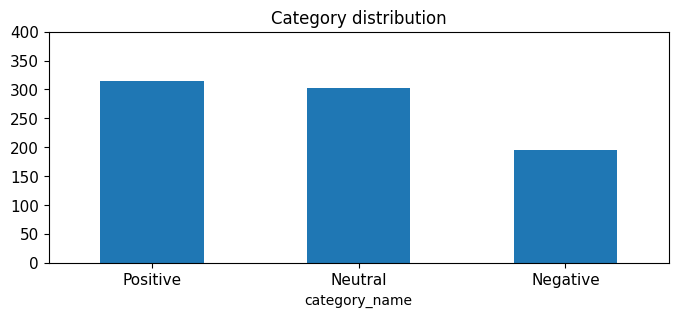

In [603]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 400],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

category_name
Positive    234
Neutral     226
Negative    140
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

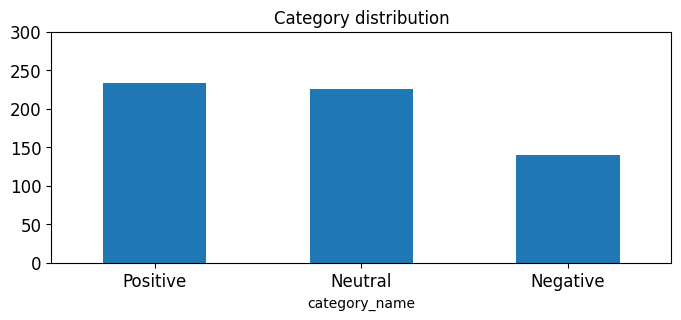

In [604]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Exercise 7 (Watch Video):**
`ylim` parameters the maximum value for y.

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

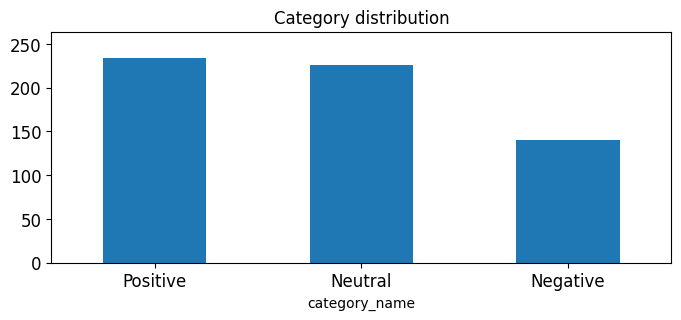

In [605]:
# Answer here
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, X_sample.category_name.value_counts().max()+30],
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Exercise 8 (take home):** 
Side-by-side comparison of the distribution between the two datasets.

In [606]:
# Answer here
print(X.category_name.value_counts())
print(X_sample.category_name.value_counts())

category_name
Positive    315
Neutral     303
Negative    195
Name: count, dtype: int64
category_name
Positive    234
Neutral     226
Negative    140
Name: count, dtype: int64


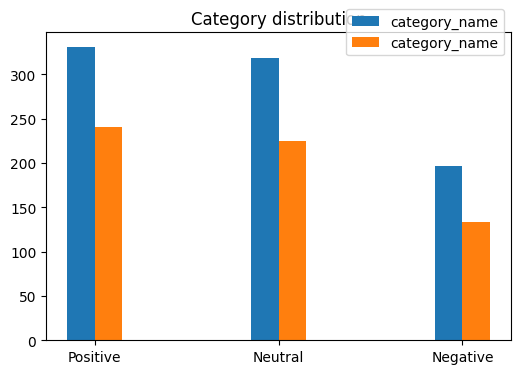

In [607]:
xlabel = ['Positive', 'Neutral', 'Negative']
X_count = [331, 319, 197]
X_sample_count = [241, 225, 134]
# setting where label located
xlabel_location = np.arange(len(xlabel))
bar_width = 0.15

plt.figure(figsize = (6,4))
plt.bar(xlabel_location, X_count, width = bar_width, label = 'category_name')
plt.bar(xlabel_location + bar_width ,X_sample_count, width = bar_width, label = 'category_name')
# Let x-axis label align middle
plt.xticks(xlabel_location + bar_width/2, xlabel)
plt.title('Category distribution')
# Setting where label-icon located
plt.legend(bbox_to_anchor=(1,1), loc='center right')
plt.show()

# This barchart is follow matplotlib guides: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

---

### 5.2 Feature Creation

NLTK library to conduct tokenization in splitting a sentence into its individual components(as words, emojis, emails, etc.) 

Call the `nltk` library as follows:

    ```python
    import nltk
    ```

In [608]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /Users/irene/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/irene/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [609]:
# takes a like a minute or two to process

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [610]:
X[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

New columns `unigrams` contains an array of tokens, which were extracted from the original `text` field. 

In [611]:
X[0:4]

,text,category,category_name,unigrams
0,Calls on retards,-1,Negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,1,Positive,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0,Neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,1,Positive,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [612]:
list(X[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

---

### 5.3 Feature subset selection

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

Use scikit learn built in functionalities to generate this document. 

In [613]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


Examples of what each feature is based on their index in the vector

In [614]:
count_vect.get_feature_names_out()[666]

'burgeoning'

In [615]:
count_vect.get_feature_names_out()[1111]

'deleted'

In [616]:
count_vect.get_feature_names_out()[3333]

'scenario'

Built-in, default tokenizer (often referred to as an `analyzer`) and then produces the word frequency vector for each document. 
Default analyzer provided by `CountVectorizer` to keep things tidy and minimal.

In [617]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

---

### **>>> Exercise 9 (Watch Video):**
Analyze the first record of our X dataframe with the new analyzer.

In [618]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(X.text[0])

['calls', 'on', 'retards']

---

Now let us look at the term-document matrix we built above.

In [619]:
# We can check the shape of this matrix by:
X_counts.shape

(813, 4313)

In [620]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

![alt txt](https://i.imgur.com/57gA1sd.png)

`fit_transform` and `CountVectorizer` learn the vocabulary dictionary and returns a term-document matrix.

To extract the first five articles and transform them into document-term matrix.

In [621]:
X_counts.shape

(813, 4313)

In [622]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [623]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

---

Heat map of the term-document matrix to better analyze data or transformation.

In [624]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [625]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [626]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

For the heat map, use `seaborn` built on top of matplotlib and closely integrated with pandas data structures.

![alt txt](https://i.imgur.com/1isxmIV.png)

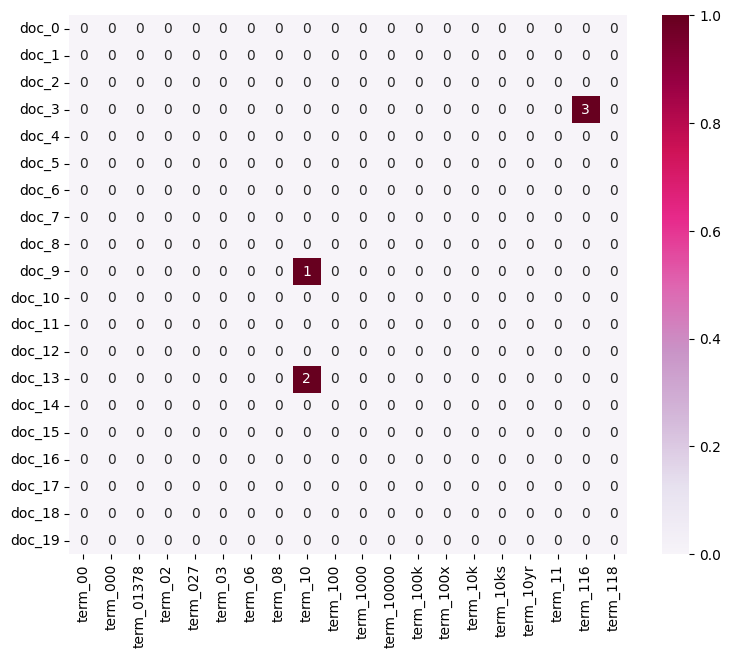

In [627]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---

### **>>> Exercise 11 (take home):** 
Try to modify the code above to plot the entire term-document matrix or just a sample of it. 

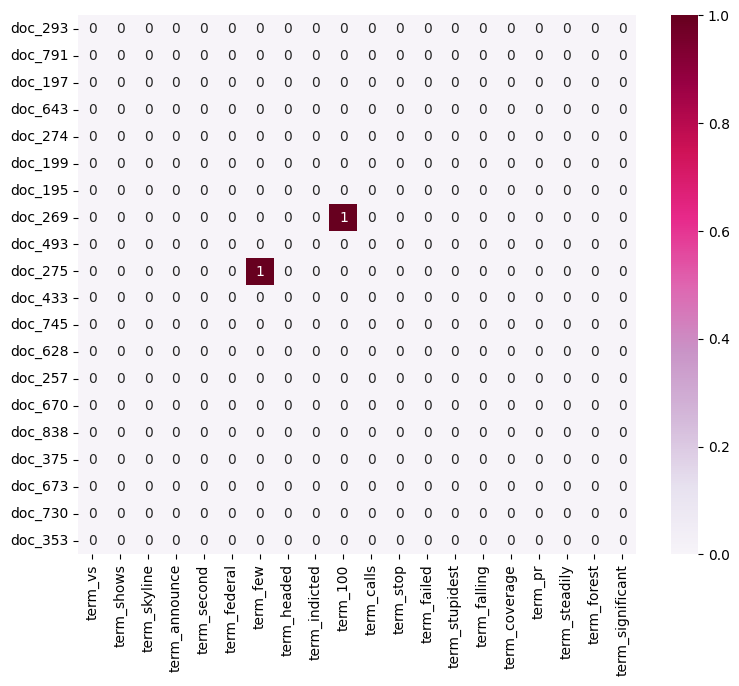

In [628]:
# Answer here
# When it says "there is a lot of words in the vocab", a helpful way to deal with it is dimension reduction.
# So I won't plot the entire term-document matrix but just part of it.

# With random sample selection:

import random # Randomly select samples 

# Select documents
random_doc = random.sample(range(len(X.index)), 20)
# Select terms
random_feature = random.sample(range(len(count_vect.get_feature_names_out())), 20)

plot_x = ["term_" + str(count_vect.get_feature_names_out()[i]) for i in random_feature]
plot_y = ["doc_" + str(X.index[i]) for i in random_doc]
plot_z = X_counts[random_doc][:, random_feature].toarray()  # X_counts[which documents, which terms]

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
plt.show() # Exercise11_homework.png

---

### 5.4 Attribute Transformation / Aggregation
To explore the data first before making any premature conclusions. 
Ttake the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words.

###  5.4.1 Transform Text Data

To compute these frequencies for each term in all documents. 
To add values of the 2D matrix, vertically; i.e., sum of each column. 

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vTMfs0zWsbeAl-wrpvyCcZqeEUf7ggoGkDubrxX5XtwC5iysHFukD6c-dtyybuHnYigiRWRlRk2S7gp/pub?w=750&h=412)

In [629]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [630]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [631]:
term_frequencies[0] #sum of first term: 00

np.int64(4)

/var/folders/_k/mqb_krdx6bg3d7mfjd8wsgx00000gn/T/ipykernel_3949/3480579971.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



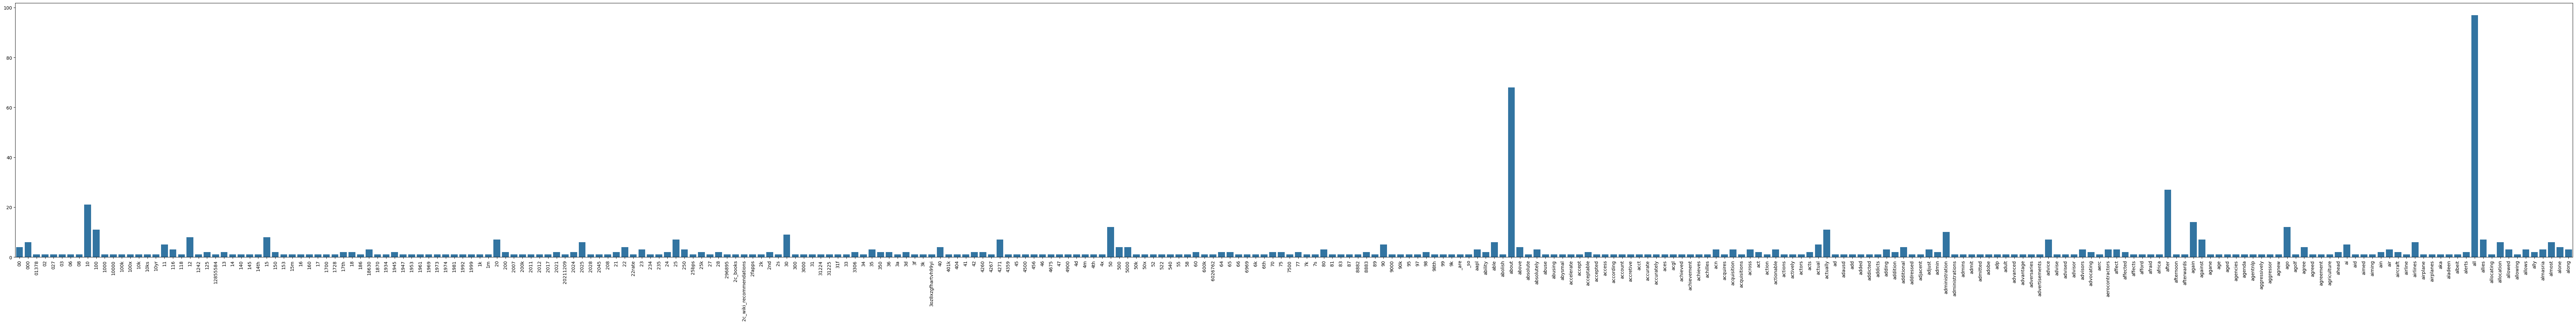

In [632]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

---

### >>> **Exercise 12 (take home):**
Use plotly to achieve a interactive visualization.

In [633]:
! pip install plotly

DEPRECATION: Loading egg at /Users/irene/anaconda3/lib/python3.11/site-packages/Pfeature-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [634]:
# Answer here
# Install and use plotly  
# Reference: https://plotly.com/python/bar-charts/ & https://plotly.com/python/reference/layout/
import plotly.express as px

# Compute frequencies
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Construct dataframe with terms and their calculating frequencies
df_use_plotly_ex12 = pd.DataFrame({"Terms": count_vect.get_feature_names_out()[:300], "Term_Frequencies": term_frequencies[:300]})

# Follow plotly usage
fig_ex12 = px.bar(df_use_plotly_ex12, 
             x = "Terms", 
             y = "Term_Frequencies",
             title = "Exercise_12")
fig_ex12.update_layout(xaxis_tickangle = -90, width = 2500, height = 600) 
# Let label of x-axis rotation like the demo
# Setting figure size to avoid all things stacking together

fig_ex12.show()

---

### >>> **Exercise 13 (take home):** 
Reduce the number of terms to visualize as an exercise. 


In [635]:
# Answer here
# To reduce the number of terms
# I set up a threshold to filter the lower frequency terms
# And then plot the frequency figure about the left terms
import plotly.express as px

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Set a minimum frequency threshold to reduce number of terms
min_frequency = 20
print("Setting threshold:", (min_frequency))

# Keep frequency of terms meeting the threshold
frequency_th = term_frequencies >= min_frequency

# Filter terms and frequencies from threshold
filter_terms = count_vect.get_feature_names_out()[frequency_th]
filter_frequencies = term_frequencies[frequency_th]
print(f"Remaining terms: {len(filter_terms)}")

df_use_plotly_ex13 = pd.DataFrame({"Terms": filter_terms, "Term_Frequencies": filter_frequencies})

fig_ex13 = px.bar(df_use_plotly_ex13, 
             x = "Terms", 
             y = "Term_Frequencies",
             title = "Exercise_13")

fig_ex13.update_layout(xaxis_tickangle = -90, width = 2500, height = 600)

fig_ex13.show()

# (Thershold, remain terms): (15, 202), (10, 310), (20, 145)

Setting threshold: 20
Remaining terms: 138


---

### >>> **Exercise 14 (take home):** 
Sort the terms on the `x-axis` by frequency instead of in alphabetical order. 

In [636]:
# Answer here
# Sort the terms on the `x-axis` by frequency instead of in alphabetical order
# "term_frequencies" can be used for feature selection to reduce the number of terms
# It can be assumed that higher frequencies indicate terms with greater importance
# By selecting first 300 high frequency terms: 
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Selecting and ranking
first_n_terms = 300
first_n_indices = np.argsort(term_frequencies)[-first_n_terms:][::-1]

df_use_plotly_ex14 = pd.DataFrame({"Terms": count_vect.get_feature_names_out()[first_n_indices], "Term_Frequencies" :term_frequencies[first_n_indices]})

fig_ex14 = px.bar(df_use_plotly_ex14, 
             x = "Terms", 
             y = "Term_Frequencies",
             title = "Exercise_14")

fig_ex14.update_layout(xaxis_tickangle = -90, width = 2500, height = 600)

fig_ex14.show()

---

Transform the values in that vector into the log distribution. 
Import the `math` library apply it to the array of values of the term frequency vector. 

In [637]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/_k/mqb_krdx6bg3d7mfjd8wsgx00000gn/T/ipykernel_3949/2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



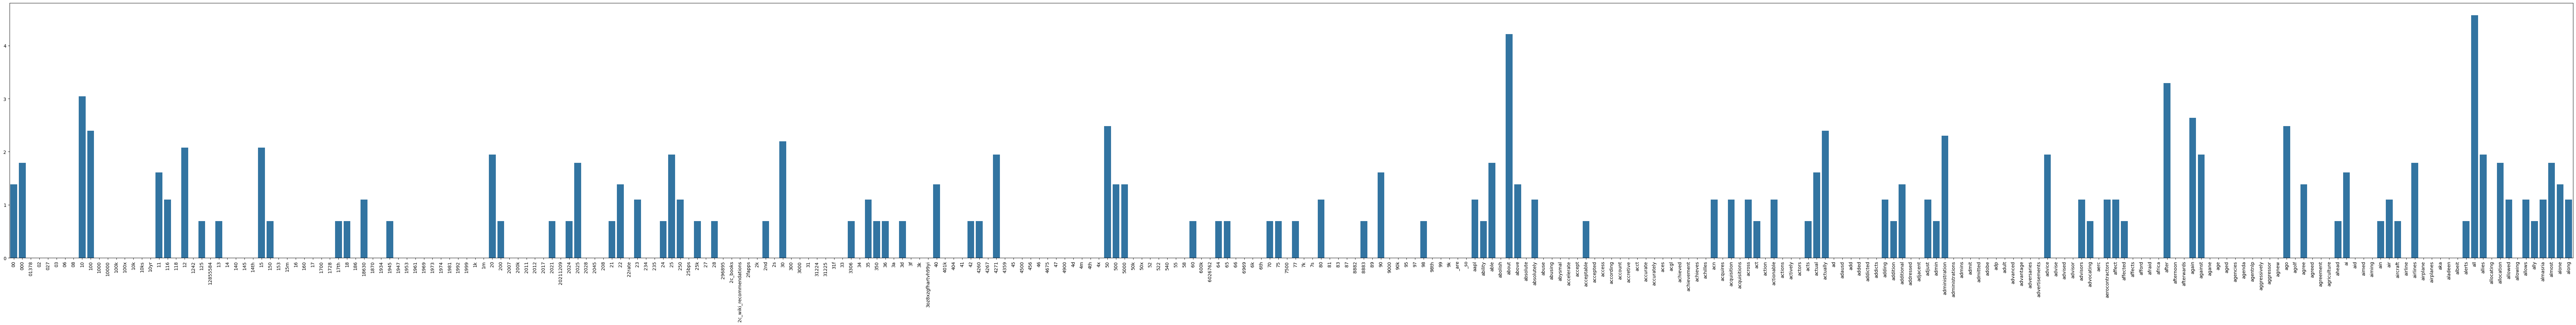

In [638]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 15 (take home):** 
From the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log'
Comment about the differences and other possible insights that can get from a log distribution.

In [639]:
# Answer here
# Plot in alphabetical order
term_frequencies_log = [math.log(i) for i in term_frequencies]

df_use_plotly_ex15 = pd.DataFrame({"Terms": count_vect.get_feature_names_out()[:300], 
                                   "Term_Frequencies_Log": term_frequencies_log[:300]})

fig_ex15 = px.bar(df_use_plotly_ex15, 
             x = "Terms", 
             y = "Term_Frequencies_Log",
             title = "Exercise_15")
fig_ex15.update_layout(xaxis_tickangle = -90, width = 2500, height = 1000) 

fig_ex15.show()

# Plot by ranking frequency (like fig_ex14)
first_n_terms = 3000 # Select more terms to see the differences overall
first_n_indices = np.argsort(term_frequencies_log)[-first_n_terms:][::-1]
term_frequencies_log = np.array(term_frequencies_log)

df_use_plotly_ex15_2 = pd.DataFrame({"Terms": count_vect.get_feature_names_out()[first_n_indices], 
                                     "Term_Frequencies_Log": term_frequencies_log[first_n_indices]})

fig_ex15_2 = px.bar(df_use_plotly_ex15_2, 
             x = "Terms", 
             y = "Term_Frequencies_Log",
             title = "Exercise_15_2")

fig_ex15_2.update_layout(xaxis_tickangle = -90, width = 8000, height = 800)

fig_ex15_2.show()


What are the differences by changing 'term_frequencies' to 'term_frequencies_log'?

        1. smaller scale range within higher and lower frequency terms

        2. the visualization shows smoother transition (without a suddenly drop-off)


What info. can get from a log distribution?

        1. provide a more normal distribution by normalized the extreme values (become better statistical properties)

        2. another perspective to analyze the relative importance of the terms

End of Phase 1

The phase 1 exercises and homeworks should be committed and submitted before September 28th

# Phase 2

In [640]:
### Begin Assignment Here